<a href="https://colab.research.google.com/github/Uysim/twitter-sentiment-analysis/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

In [0]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [0]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('Angkor Wat', count=2000)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))


print(tweets[0].created_at)

,Tweets
0,"Angkor Wat Temple, Cambodian People, and Khmer..."
1,RT @CampCambodia: Spend a day to explore the w...
2,📺 El misterioso templo hinduista de Angkor Wat...
3,Spend a day to explore the world famous temple...
4,這一次的柬埔寨之旅，讓我們更堅固💪🏾\n\n你沒事就好💜\n我們回家嚕！\n\n#杰羚在暹粒...
5,Una vez al año el sol se alinea con la perspec...
6,"RT @HKA_2017: A treasure to be cherished, Padm..."
7,https://t.co/MGVeCidnZP\nDiscover the temples ...
8,"RT @HKA_2017: A treasure to be cherished, Padm..."
9,RT @GetawayMagazine: After two elephants died ...


2019-06-24 06:34:20


In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
sid = SentimentIntensityAnalyzer()

neutrals = []
negatives = []
compounds = []
positives = []

for index, row in data.iterrows():
  result = sid.polarity_scores(row["Tweets"])
  negatives.append(result['neg'])
  neutrals.append(result['neu'])
  positives.append(result['pos'])
  compounds.append(result['compound'])
  
data['negative'] = negatives
data['neutral'] = neutrals
data['compound'] = compounds
data['positive'] = positives

display(data.head(100))

,Tweets,negative,neutral,compound,positive
0,"Angkor Wat Temple, Cambodian People, and Khmer...",0.000,0.913,0.2023,0.087
1,RT @CampCambodia: Spend a day to explore the w...,0.000,1.000,0.0000,0.000
2,📺 El misterioso templo hinduista de Angkor Wat...,0.000,1.000,0.0000,0.000
3,Spend a day to explore the world famous temple...,0.000,1.000,0.0000,0.000
4,這一次的柬埔寨之旅，讓我們更堅固💪🏾\n\n你沒事就好💜\n我們回家嚕！\n\n#杰羚在暹粒...,0.000,1.000,0.0000,0.000
5,Una vez al año el sol se alinea con la perspec...,0.000,1.000,0.0000,0.000
6,"RT @HKA_2017: A treasure to be cherished, Padm...",0.000,0.693,0.7263,0.307
7,https://t.co/MGVeCidnZP\nDiscover the temples ...,0.000,1.000,0.0000,0.000
8,"RT @HKA_2017: A treasure to be cherished, Padm...",0.000,0.693,0.7263,0.307
9,RT @GetawayMagazine: After two elephants died ...,0.318,0.636,-0.7506,0.047


In [0]:
data['sentiment'] = data[['negative', 'neutral', 'compound', 'positive']].idxmax(axis=1)

In [0]:
data.head(10)

,Tweets,negative,neutral,compound,positive,sentiment
0,"Angkor Wat Temple, Cambodian People, and Khmer...",0.0,0.913,0.2023,0.087,neutral
1,RT @CampCambodia: Spend a day to explore the w...,0.0,1.000,0.0000,0.000,neutral
2,📺 El misterioso templo hinduista de Angkor Wat...,0.0,1.000,0.0000,0.000,neutral
3,Spend a day to explore the world famous temple...,0.0,1.000,0.0000,0.000,neutral
4,這一次的柬埔寨之旅，讓我們更堅固💪🏾\n\n你沒事就好💜\n我們回家嚕！\n\n#杰羚在暹粒...,0.0,1.000,0.0000,0.000,neutral


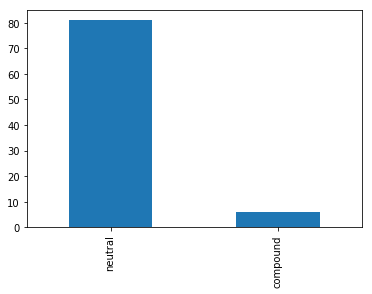

In [0]:
data["sentiment"].value_counts().plot.bar()